In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import textstat
import os

# volume result - all words + keywords catrgory

In [21]:
base = '/Users/carina/Downloads/courses/final thesis/precessed data/ex3/jaccard/'
overall_value = pd.DataFrame()
source = ['Instruction Manuals','News','Encyclopedias','Literature','NLP paper','Interview','Social Media','Speeches']

datasource = []
for i in range(len(source)):
    tem = [source[i]] * 60
    datasource = datasource + tem

overall_value_value = []
overall_value_tool = []
overall_value_category = []
overall_value_datasource = []

for root, ds, fs in os.walk(base):
    for f in fs:
        fullpath = os.path.join(root, f)
        df = pd.read_csv(fullpath)
        df = df.drop(df.columns[0],axis=1)
        WATs = ['Rephrase','Grammarly','ChatGPT','Wordtune','Quillbot']
        df.columns = WATs
        heads = df.columns.values.tolist()
                
        category = f.split('.')[0]
        if len(category) != 0:
            
            for head in heads:
                tem = df[head].tolist()
                for item in tem:
                    overall_value_value.append(item)
                    overall_value_tool.append(head)
                    overall_value_category.append(category)
                #overall_value_datasource.append(datasource)
                overall_value_datasource = overall_value_datasource + datasource
                        
overall_value['jaccard'] = overall_value_value
overall_value['WATs'] = overall_value_tool
overall_value['category'] = overall_value_category
overall_value['datasource'] = overall_value_datasource

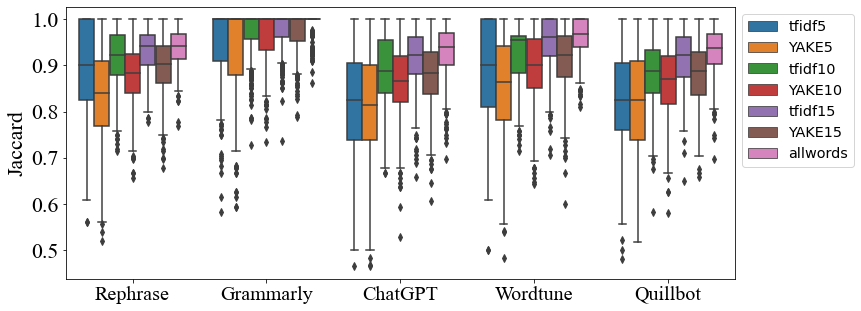

In [22]:
f, axes = plt.subplots(1, 1,sharex=True, figsize=(12,5))

orders = ['tfidf5','YAKE5','tfidf10','YAKE10','tfidf15','YAKE15','allwords']
#my_pal = {"BERT": "g", "GPT2": "b"}

a = sns.boxplot(y="jaccard",x= "WATs",hue="category", hue_order=orders,data=overall_value)
a.legend (fontsize='x-large',bbox_to_anchor = (1, 1))

plt.xlabel("", fontdict={'family' : 'Times New Roman', 'size'   : 320})
plt.ylabel("Jaccard", fontdict={'family' : 'Times New Roman', 'size'   : 22})
plt.yticks(fontproperties = 'Times New Roman', size = 22)
plt.xticks(fontproperties = 'Times New Roman', size = 20)
plt.savefig('/Users/carina/Downloads/courses/final thesis/figures of results/word/jaccard overall.pdf', format = 'pdf',dpi = 500,bbox_inches='tight')


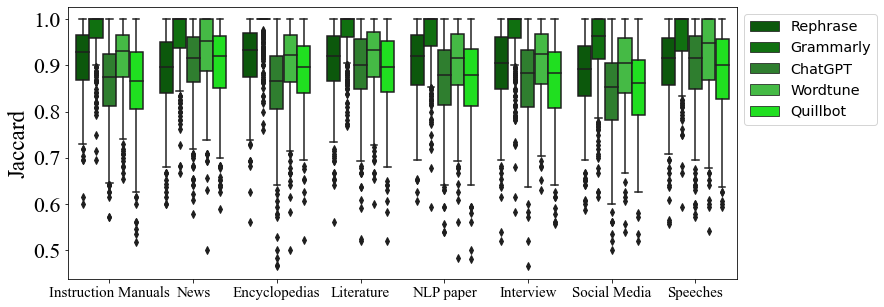

In [31]:
f, axes = plt.subplots(1, 1,sharex=True, figsize=(12,5))

orders = ['tfidf5','YAKE5','tfidf10','YAKE10','tfidf15','YAKE15','allwords']
my_pal = {"Rephrase" : 'darkgreen','Grammarly': "green",'ChatGPT': "forestgreen",'Wordtune': "limegreen",'Quillbot': "lime"}
#my_pal = {"BERT": "g", "GPT2": "b"}

a = sns.boxplot(y="jaccard",x= "datasource",hue="WATs",data=overall_value,palette=my_pal)
a.legend (fontsize='x-large',bbox_to_anchor = (1, 1))

plt.xlabel("", fontdict={'family' : 'Times New Roman', 'size'   : 310})
plt.ylabel("Jaccard", fontdict={'family' : 'Times New Roman', 'size'   : 23})
plt.yticks(fontproperties = 'Times New Roman', size = 22)
plt.xticks(fontproperties = 'Times New Roman', size = 15)
plt.savefig('/Users/carina/Downloads/courses/final thesis/figures of results/word/Jaccard similarities based on the datasources.pdf', format = 'pdf',dpi = 500,bbox_inches='tight')


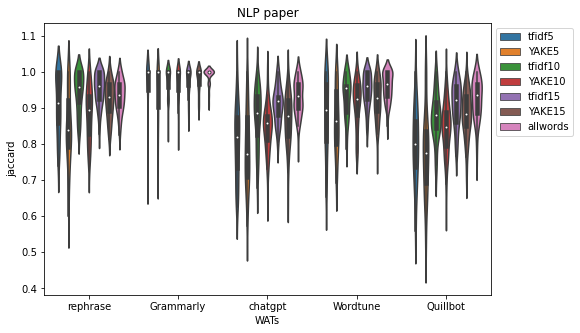

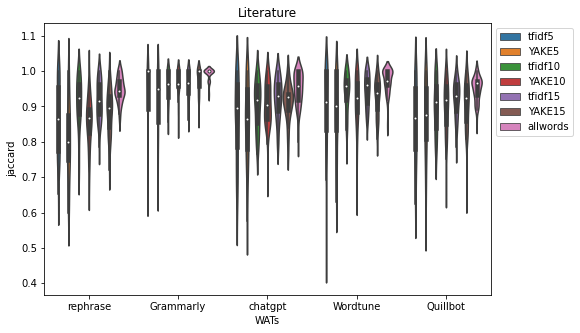

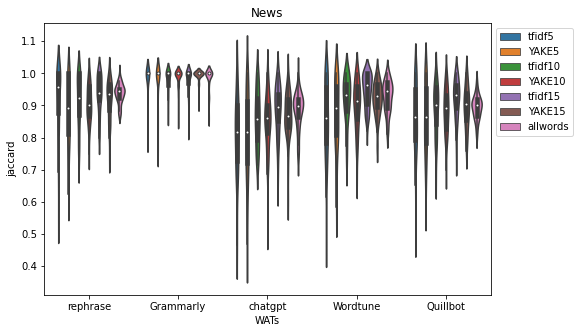

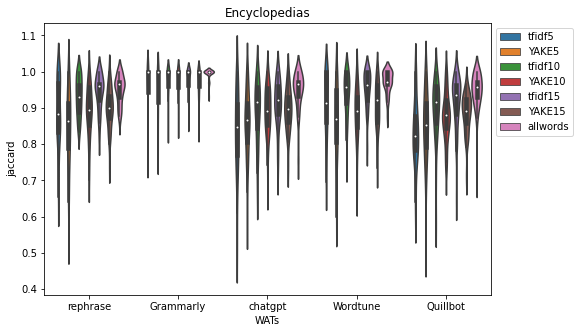

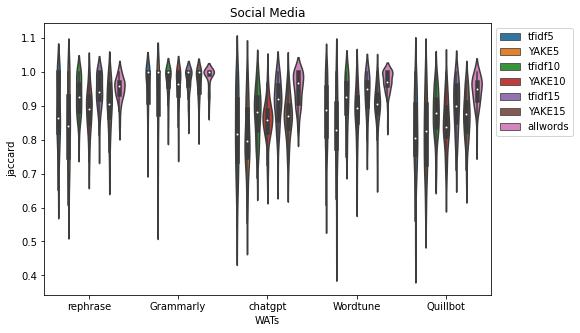

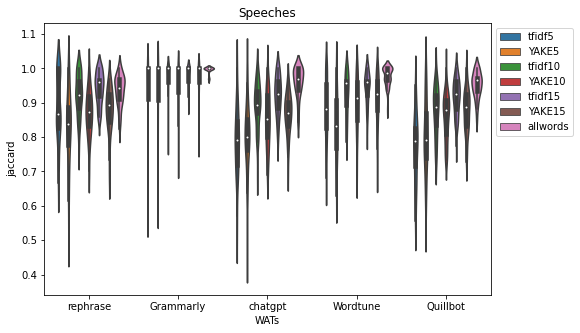

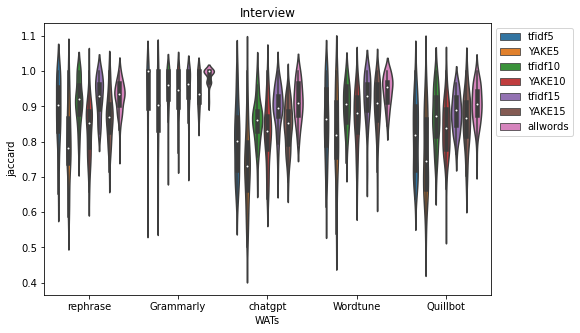

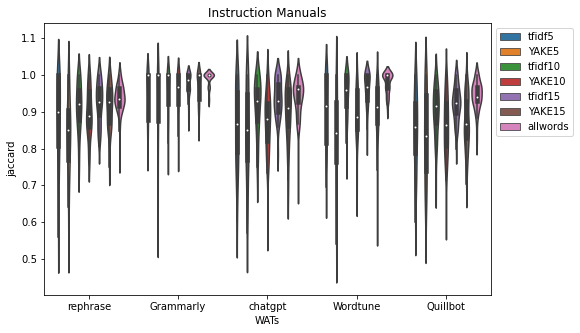

In [38]:
for item in source:
    df_source = overall_value[overall_value['datasource'] == item]
    orders = ['tfidf5','YAKE5','tfidf10','YAKE10','tfidf15','YAKE15','allwords']
    fig, axs = plt.subplots(1,1, figsize=(8,5), sharey=True, sharex=False)
    #fig.suptitle('Jaccard-datasource-WATs')

    a = sns.violinplot(x="WATs", y="jaccard", hue="category",hue_order=orders,data=df_source, showmeans=False,showmedians=False, showextrema=False)
    a.legend(bbox_to_anchor = (1, 1))
    a.set_title(item)
